<center>
<img src="../images/fscampus_small2.png" width="1200"/>
</center>

<center>

# Investments

***Finance 2 - BFIN***

**Dr. Omer Cayirli**

Lecturer in Empirical Finance

omer.cayirli@vgu.edu.vn
</center>

---

## Lecture 09

---


### Outline

*   Derivatives I
    *   Introduction to derivatives
    
    *   Futures & Forwards
    
    *   Swaps Contracts

---



### Introduction to Derivatives

*   A derivative is a financial instrument whose payoffs and values are derived from or depend on an underlying asset.
    
    *   Futures and Forwards
    
    *   Options
    
    *   Swaps
    
    *   Exotics

*   Derivatives play a key role in transferring risks in the economy.

*   A derivative may be,
    
    *   A standalone instrument
    
    *   Embedded in other products

---



### Introduction to Derivatives

*   The underlying asset
    
    *   Stocks & Stock indices
    
    *   Bonds (credit derivatives)
    *   Energy (crude oil, natural gas, power, emissions)
    *   Commodities
        *   Agriculture (grain, pork belly, cattle, sugar, etc).
        *   Metals
    *   Others
        *   Weather (amount of snow, temperature)
        *   Insurance derivatives

---



### Introduction to Derivatives

*   What are derivatives are used for?
    
    *   Hedging
        *   Risk management: Cut away unwanted portions of risk exposure and even transform the exposures into quite different forms.
    
    *   Speculation
        *   No offsetting exposure
    
    *   To lock in an arbitrage profit
    
    *   To change the nature of a liability
    
    *   To change the nature of an investment without incurring the costs of selling one portfolio and buying another.

---





### Forward Contracts

*   A forward contract is an agreement (contract) to buy or sell an asset at a certain future time for a certain price
    *   An agreement (Forward contract)
    *   To buy / sell an asset (trade Underlying asset)
    *   At future time (Maturity)
    *   For a certain price (Forward price)

*   The buyer and the seller are obligated to perform under the terms of the contract.

*   OTC Transactions

    ---

*   Two parties agree to exchange some item in the future at a delivery price specified now.

*   The forward price is defined as the delivery price that makes the current market value of the contract zero.
    *   No money is paid in the present by either party to the other.

*   The face value of the contract is the quantity of the item specified in the contract times the forward price.

*   The party who agrees to buy the specified item is said to take a long position, and the party who agrees to sell the item is said to take a short position.

---


### Forward Contracts

**Question:**
*   **Scenario A:** TechCom Inc. needs to pay ¥500 million to a Japanese supplier in 3 months. It decides to hedge this currency risk. What is the appropriate forward position?
*   **Scenario B:** AgriExport Co. expects to receive €5 million from European customers in 6 months. It decides to hedge. What is the appropriate forward position?

**Analysis:**
*   **TechCom (Paying Foreign Currency):** 
    *   Needs to buy Yen in the future. 
    *   To hedge against the Yen appreciating (Spot Price rising), they should take a **Long Forward** position on the Yen.

*   **AgriExport (Receiving Foreign Currency):** 
    *   Needs to sell Euros in the future. 
    *   To hedge against the Euro depreciating (Spot Price falling), they should take a **Short Forward** position on the Euro.

**Payoff Formulas:**
*   For $S_T$ = spot price at maturity, and $F$ = Forward price;
    
    *   The payoff from a long position in a forward contract is: $S_T - F$
    
    *   The payoff from a short position in a forward contract is: $F – S_T$

---

Long muốn giá tăng tăng(bên mua)

Short muốn giá giảm giảm( bên bán)

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Plotting Function ---
def plot_forward_payoff(forward_price):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Generate a range of potential Spot Prices at Maturity (ST)
    st_range = np.linspace(forward_price * 0.5, forward_price * 1.5, 100)
    
    # --- Plot 1: Long Forward (Scenario A: TechCom) ---
    long_payoff = st_range - forward_price
    
    ax1.plot(st_range, long_payoff, color='green', linewidth=2.5, label='Payoff ($S_T - F$)')
    ax1.axhline(0, color='black', linewidth=1)
    ax1.axvline(forward_price, color='gray', linestyle='--', label=f'Forward Price (F={forward_price})')
    
    # Shade profit/loss areas
    ax1.fill_between(st_range, 0, long_payoff, where=(long_payoff > 0), color='green', alpha=0.1)
    ax1.fill_between(st_range, 0, long_payoff, where=(long_payoff < 0), color='red', alpha=0.1)
    
    ax1.set_title('Long Forward Payoff (Buying Asset)', fontsize=14)
    ax1.set_xlabel('Spot Price at Maturity ($S_T$)', fontsize=12)
    ax1.set_ylabel('Profit / Loss', fontsize=12)
    ax1.legend()
    ax1.grid(True, linestyle=':', alpha=0.6)

    # --- Plot 2: Short Forward (Scenario B: AgriExport) ---
    short_payoff = forward_price - st_range
    
    ax2.plot(st_range, short_payoff, color='red', linewidth=2.5, label='Payoff ($F - S_T$)')
    ax2.axhline(0, color='black', linewidth=1)
    ax2.axvline(forward_price, color='gray', linestyle='--', label=f'Forward Price (F={forward_price})')
    
    # Shade profit/loss areas
    ax2.fill_between(st_range, 0, short_payoff, where=(short_payoff > 0), color='green', alpha=0.1)
    ax2.fill_between(st_range, 0, short_payoff, where=(short_payoff < 0), color='red', alpha=0.1)
    
    ax2.set_title('Short Forward Payoff (Selling Asset)', fontsize=14)
    ax2.set_xlabel('Spot Price at Maturity ($S_T$)', fontsize=12)
    ax2.set_ylabel('Profit / Loss', fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle=':', alpha=0.6)

    plt.tight_layout()
    plt.show()

# --- Interactive Setup ---
style = {'description_width': 'initial'}
forward_price_slider = widgets.FloatSlider(
    value=100.0, min=10.0, max=200.0, step=1.0, 
    description='Forward Price ($F$):', 
    style=style, layout=widgets.Layout(width='50%')
)

ui = widgets.VBox([
    widgets.HTML("<h3>Forward Contract Payoffs</h3>"),
    forward_price_slider,
    widgets.interactive_output(plot_forward_payoff, {'forward_price': forward_price_slider})
])

display(ui)

### Forward Contracts

*   **Spot-Forward Parity:** 
    *   The forward price ($F$) is the delivery price that makes the current value of the contract zero. 
    *   To prevent arbitrage, the cost of buying the asset today ($S_0$) must equal the present value of buying it forward ($PV(F)$).
    $$S_0 = \frac{F}{(1+r)^T} \quad \Rightarrow \quad F = S_0(1 + r)^T$$

*   The forward price is simply the spot price compounded at the risk-free rate. 
    *   It represents the "cost of carry" (interest foregone) for holding the asset.

**Replication: Synthetic Stock Position**
*Assume $S_0 = \$50$, $r_f = 5\%$, and $T=1$ year. Thus, $F = \$50(1.05) = \$52.50$.*

| Strategy | Action | Cash Flow Today ($t=0$) | Cash Flow at Maturity ($t=1$) |
| :--- | :--- | :---: | :---: |
| **Direct Purchase** | Buy 1 share of stock | -$50.00 | $S_1$ |
| **Synthetic Purchase** | 1. Long Forward Contract ($F=\$52.50$) | $0.00 | $S_1 - 52.50$ |
| | 2. Buy Risk-Free Bond (Face Value = $F$) | -$50.00 | $52.50$ |
| | **Total Synthetic Portfolio** | **-$50.00** | **$S_1$** |

*Conclusion: Since the payoffs at $t=1$ are identical ($S_1$), the initial cost must be identical ($S_0$).*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- 1. Core Logic ---
def plot_replication(S0, rf_pct, T):
    rf = rf_pct / 100
    F = S0 * (1 + rf)**T
    bond_cost = F / ((1 + rf)**T) # Should equal S0
    
    # Range of possible future stock prices (S_T)
    ST_range = np.linspace(S0 * 0.5, S0 * 1.5, 100)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Plot 1: Payoff Decomposition at Maturity (t=T) ---
    # 1. Forward Payoff
    forward_payoff = ST_range - F
    ax1.plot(ST_range, forward_payoff, linestyle='--', color='blue', label='Long Forward ($S_T - F$)')
    
    # 2. Bond Payoff
    bond_payoff = np.full_like(ST_range, F)
    ax1.plot(ST_range, bond_payoff, linestyle='--', color='green', label=f'Risk-Free Bond (Face={F:.2f})')
    
    # 3. Synthetic Stock (Sum)
    synthetic_payoff = forward_payoff + bond_payoff
    ax1.plot(ST_range, synthetic_payoff, color='black', linewidth=3, alpha=0.6, label='Synthetic Stock (Sum)')
    
    # 4. Actual Stock Payoff (Reference)
    ax1.scatter(ST_range[::10], ST_range[::10], color='red', marker='x', label='Actual Stock ($S_T$)')

    ax1.set_title(f'Payoff Replication at Maturity (T={T} yrs)', fontsize=14)
    ax1.set_xlabel('Stock Price at Maturity ($S_T$)', fontsize=12)
    ax1.set_ylabel('Payoff Value', fontsize=12)
    ax1.legend()
    ax1.grid(True, linestyle=':', alpha=0.6)

    # --- Plot 2: Spot-Forward Parity (Time Value) ---
    time = np.linspace(0, T, 100)
    spot_growth = S0 * (1 + rf)**time
    
    ax2.plot(time, spot_growth, color='purple', linewidth=2, label='No-Arbitrage Growth path')
    ax2.scatter([0], [S0], color='blue', s=100, label=f'Spot Price ($S_0$={S0})')
    ax2.scatter([T], [F], color='red', s=100, label=f'Forward Price ($F$={F:.2f})')
    
    # Annotate the "Cost of Carry"
    mid_t = T / 2
    mid_val = S0 * (1 + rf)**mid_t
    ax2.annotate(f'Growth @ {rf_pct}% Risk-Free Rate', 
                 xy=(mid_t, mid_val), xytext=(mid_t + 0.1, mid_val - 2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    ax2.set_title('Spot-Forward Parity: The Cost of Carry', fontsize=14)
    ax2.set_xlabel('Time (Years)', fontsize=12)
    ax2.set_ylabel('Price', fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle=':', alpha=0.6)

    plt.tight_layout()
    plt.show()

# --- 2. Interactive Widgets ---
style = {'description_width': 'initial'}
s0_slider = widgets.FloatSlider(value=50.0, min=10, max=100, step=1, description='Spot Price ($S_0$):', style=style)
rf_slider = widgets.FloatSlider(value=5.0, min=0, max=15, step=0.5, description='Risk-Free Rate (%):', style=style)
t_slider = widgets.IntSlider(value=1, min=1, max=5, step=1, description='Time to Maturity (Yrs):', style=style)

ui = widgets.VBox([
    widgets.HTML("<h3>Visualizing Forward Pricing & Replication</h3>"),
    widgets.HBox([s0_slider, rf_slider, t_slider]),
    widgets.interactive_output(plot_replication, {'S0': s0_slider, 'rf_pct': rf_slider, 'T': t_slider})
])

display(ui)

### Forward Contracts

**Currency Forward Payoff**
A multinational corporation enters into a 6-month **short forward** contract to sell €50 million. The agreed forward rate is \$1.10 per Euro. Calculate the gain or loss if the spot exchange rate at maturity is:
(a) \$1.05 per Euro
(b) \$1.15 per Euro

*   **Payoff (Short Position):** Notional $\times (F - S_T)$
*   (a) $€50 \text{ m} \times (1.10 - 1.05) = €50 \text{ m} \times 0.05 = \mathbf{\$2.5 \text{ million Gain}}$
*   (b) $€50 \text{ m} \times (1.10 - 1.15) = €50 \text{ m} \times -0.05 = \mathbf{-\$2.5 \text{ million Loss}}$

**Gold Arbitrage**
The spot price of gold is currently **\$1,900** per ounce. A 1-year forward contract is trading at **\$2,050**. The risk-free interest rate is **4%**. Is there an arbitrage opportunity? If so, what is the strategy?

*   **Fair Forward Price:** $F_{Theory} = S_0 (1+r)^T = 1900 \times 1.04 = \mathbf{\$1,976}$
*   The market forward price (\$2,050) is **overpriced** relative to the theoretical price (\$1,976).
*   Cash and Carry Arbitrage
    1.  Borrow \$1,900 at 4%.
    2.  Buy 1 oz of Gold Spot for \$1,900.
    3.  Enter a Short Forward contract at \$2,050.
    *   **At Maturity:** Deliver the gold to settle the forward for \$2,050. Repay the loan (\$1,900 $\times$ 1.04 = \$1,976).
    *   **Risk-Free Profit:** $\$2,050 - \$1,976 = \mathbf{\$74}$.

| Action at Time 0 (Today) | Cash Flow ($t=0$) | Action at Time 1 (Maturity) | Cash Flow ($t=1$) |
| :--- | ---: | :--- | ---: |
| 1. Borrow \$1,900 at 4% | +$1,900 | Repay Loan Principal + Interest | -$1,976 |
| 2. Buy 1 oz Gold Spot | -$1,900 | Sell Gold via Forward Contract | +$2,050 |
| 3. Enter Short Forward @ \$2,050 | $0 | (Obligation to sell gold) | -- |
| **Net Cash Flow** | **$0** | **Risk-Free Profit** | **+$74** |


---

Bạn vay tiền → mua vàng → khóa giá bán cao → đến hạn bán vàng → trả nợ → còn dư 74 USD.

### Futures Contracts

*   Available on a wide range of underlying assets.

*   Exchange traded

*   Specifications need to be defined:
    *   What can be delivered,
    *   Where it can be delivered,
    *   When it can be delivered

*   Settled daily (Marked-to-market)

    ---

*   Margin
    *   A margin is cash or marketable securities deposited by an investor with his or her broker.
        *   The balance in the margin account is adjusted to reflect daily settlement.
        *   Margins minimize the possibility of a loss through a default on a contract.
    
    *   Upon contract initiation, both parties open margin accounts.
        
    *   Associated with each type of contract is an initial margin and a maintenance margin.
        *   The initial deposit of funds into the margin account is known as initial margin.
        *   The maintenance margin is less than the initial margin.
    
    *   If the balance in your margin account falls below the maintenance margin, you will receive a margin call that requires you to increase your margin account back to the initial margin level.

---



### Futures Contracts: Marking-to-Market

**Scenario:** An investor goes long 2 Silver futures contracts.
*   **Contract Size:** 5,000 oz (Total Position: 10,000 oz).
*   **Entry Price:** \$25.00.
*   **Initial Margin:** \$20,000.
*   **Maintenance Margin:** \$15,000.

**Daily Margin Account Tracking:**

| Day | Futures Price ($) | Daily P&L ($) | Account Balance ($) | Margin Call ($) |
| :--- | :--- | :--- | :--- | :--- |
| **Day 0** | **25.00** | -- | **20,000** | -- |
| Day 1 | 24.80 | (2,000) | 18,000 | 0 |
| Day 2 | 24.40 | (4,000) | 14,000 | **+6,000** |
| **Day 2 (Post)** | -- | -- | **20,000** | -- |
| Day 3 | 25.10 | +7,000 | 27,000 | 0 |
| Day 4 | 25.50 | +4,000 | 31,000 | 0 |
| Day 5 | 26.20 | +7,000 | 38,000 | 0 |
| Day 6 | 26.00 | (2,000) | 36,000 | 0 |


---

### Futures Contracts

A trader enters into a short cotton futures contract when the futures price is 60 cents per pound. The contract is for the delivery of 50,000 pounds. How much does the trader gain or lose if the cotton price at the end of the contract is (a) 58.20 cents per pound; (b) 61.30 cents per pound?

Payoff from a short position: $F – S_T$

$50,000 * (0.60 – 0.5820) = \$900$

$50,000 * (0.60 – 0.6130) = -\$650$

--- 
Suppose that you enter into a short futures contract to sell July silver for $25.00 per ounce. The size of the contract is 5,000 ounces. The initial margin is $15,000, and the maintenance margin is $12,000. What change in the futures price will lead to a margin call?

Loss $\ge$ (Initial Margin – Maintenance Margin)
$$5000 * (P_1 – 25.00) \ge (15,000 – 12,000) \quad \Rightarrow \quad 5000 * (P_1 – 25.00) \ge 3,000 \quad \Rightarrow \quad P_1 \ge 25.60$$

---

### Futures Contracts

A company enters into a short futures contract to sell 5,000 bushels of wheat for 500 cents ($5.00) per bushel. The initial margin is $3,000 and the maintenance margin is $2,000. 
-   What price change would lead to a margin call? 
-   Under what circumstances could $1,500 be withdrawn from the margin account?

Loss $\ge$ (Initial Margin – Maintenance Margin)
$$5000 * (P_1 – 5.00) \ge (3,000 – 2,000) \quad \Rightarrow \quad P_1 \ge 5.20$$

Gain $\ge$ Withdrawal Amount
$$5000 * (5.00 - P_2) \ge 1,500 \quad \Rightarrow \quad P_2 \le 4.70$$

---

### Futures Contracts: Pricing Formulas

*   **Investment Asset (Basic)**
    $$F = S_0 e^{rT}$$

*   **Asset with Known Cash Income ($I$):**
    $$F = (S_0 - PV(I)) e^{rT}$$
    
*   **Asset with Known Yield ($q$):**
    $$F = S_0 e^{(r-q)T}$$
    
*   **Currency Forwards (Interest Rate Parity)**
    $$F_{D/F} = S_{0,D/F} e^{(r_D-r_F)T}$$

*   **Commodities with Storage Costs ($U$ or $u$)**
    *   Fixed Storage Cost ($U$ = PV of costs):
        $$F = (S_0 + U) e^{rT}$$
    *   Proportional Storage Cost ($u$ as % per year):
        $$F = S_0 e^{(r+u)T}$$

---

### Futures Contracts: Pricing Examples

**Continuous Compounding**

A stock index is currently at **1,500**. The risk-free rate is **3%** per annum (continuously compounded) and the dividend yield on the index is **1%**. What is the 6-month futures price?
$$F = S_0 e^{(r-q)T}$$
$$F = 1500 \times e^{(0.03 - 0.01) \times 0.5} = 1500 \times e^{0.01} = 1500 \times 1.01005 = \mathbf{1,515.08}$$

**Forward Price with Known Income**

A corporate bond is priced at **\$980**. It will pay a coupon of **\$40** in 3 months. The risk-free rate is **4%** (continuous). What is the 6-month forward price?

*   PV of the coupon ($I$): $I = 40 \times e^{-0.04 \times 0.25} = 39.60$

*   $F = (S_0 - I) e^{rT}$

*   $F = (980 - 39.60) \times e^{0.04 \times 0.5} = 940.40 \times 1.0202 = \mathbf{959.40}$

**Commodity with Storage Costs**

The spot price of corn is **\$5.00** per bushel. Storage costs are **\$0.12** per bushel per year, paid upfront. The risk-free rate is **5%**. What is the 1-year futures price?

*   $PV(Storage) = U = 0.12$ (assuming paid today)

*   $F = (S_0 + U) e^{rT} = (5.00 + 0.12) \times e^{0.05 \times 1} = 5.12 \times 1.05127 = \mathbf{5.38}$

---

### Futures Contracts

*   Long & Short Hedges
    *   A long futures hedge is appropriate when you know you will purchase an asset in the future and want to lock in the price.
    
    *   A short futures hedge is appropriate when you know you will sell an asset in the future & want to lock in the price.

*   Arguments in favor of hedging
    *   Companies should focus on the main business they are in and take steps to minimize risks arising from interest rates, exchange rates, and other market variables.

*   Arguments against hedging
    *   Shareholders are usually well diversified and can make their own hedging decisions.
    
    *   It may increase risk to hedge when competitors do not.
    
    *   Explaining a situation where there is a loss on the hedge and a gain on the underlying can be difficult.

---

### Swaps

*   A swap is an over-the-counter derivatives agreement between two companies to exchange cash flows in the future according to certain specified rules.
    *   The agreement defines the dates when the cash flows are to be paid and the way in which they are to be calculated.
    *   Usually, the calculation of the cash flows involves the future value of an interest rate, an exchange rate, or other market variable.
    *   Counterparty risk.

*   A forward contract can be viewed as a simple example of a swap.
    *   Whereas a forward contract is equivalent to the exchange of cash flows on just one future date, swaps typically lead to cash-flow exchanges taking place on several future dates.

*   Main types
    *   Interest rate swaps,
    *   Currency swaps,
    *   Credit default swaps.

---



### Swaps

*   Interest rate swaps
    
    *   The counterparties swap payments in the same currency based on an interest rate.
    
        *   An agreement by TechGlobal Inc. to receive 3-month SOFR and pay a fixed rate of 4.5% per annum every 3 months for 5 years on a notional principal of $50 million.
    
        *   This is a plain vanilla interest rate swap in which a company agrees to pay cash flows equal to interest at a predetermined fixed rate on a notional principal for a predetermined number of years. In return, it receives interest at a floating rate on the same notional principal for the same period of time.
    
        *   The floating interest rate is commonly referred to as the reference rate.
    
            *   The floating rate in most modern interest rate swap agreements is the Secured Overnight Financing Rate (SOFR).
    
            *   It is a broad measure of the cost of borrowing cash overnight collateralized by Treasury securities.
    
            *   Reference rates are published daily and serve as the benchmark for the floating leg of the swap.

---


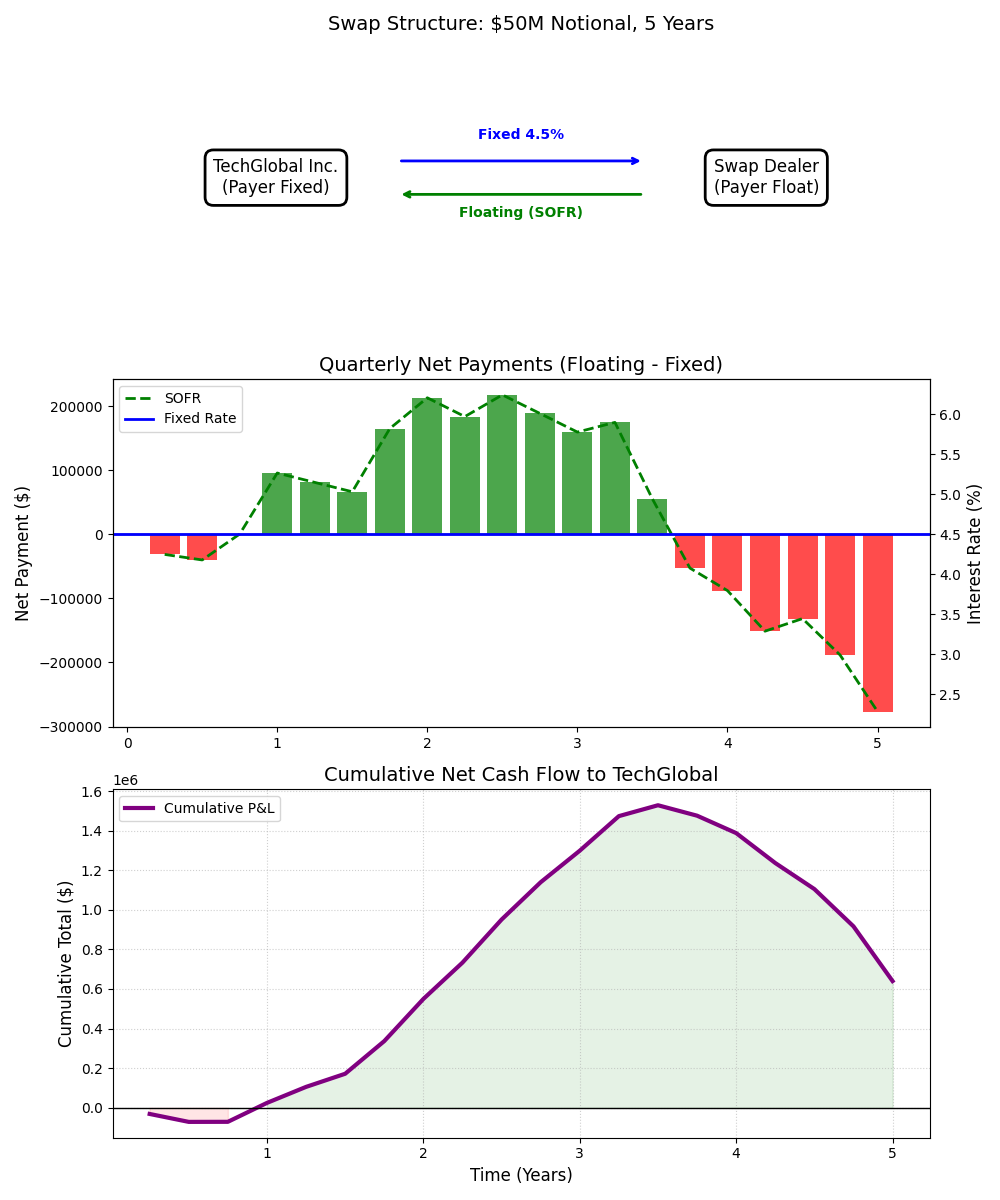

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import BytesIO
import base64
from IPython.display import display, HTML

# --- Swap Parameters ---
notional = 50_000_000
fixed_rate = 0.045
years = 5
freq = 4
periods = years * freq
time = np.arange(1, periods + 1) / freq

# --- Simulate Floating Rates (SOFR) ---
np.random.seed(42)
floating_rates = np.abs(0.04 + np.cumsum(np.random.normal(0, 0.005, periods)))

# --- Calculate Cash Flows ---
dt = 1/freq
fixed_payments = np.full(periods, notional * fixed_rate * dt)
floating_payments = notional * floating_rates * dt
net_payments = floating_payments - fixed_payments
cumulative_net = np.cumsum(net_payments)

# --- Plotting ---
# Adjusted height ratios for 3 panels
fig, (ax1, ax2, ax4) = plt.subplots(3, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [0.8, 1, 1]})

# 1. Structure Diagram
ax1.axis('off')
ax1.set_xlim(0, 10); ax1.set_ylim(0, 5)
bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=2)
ax1.text(2, 2.5, "TechGlobal Inc.\n(Payer Fixed)", ha="center", va="center", size=12, bbox=bbox_props)
ax1.text(8, 2.5, "Swap Dealer\n(Payer Float)", ha="center", va="center", size=12, bbox=bbox_props)
ax1.annotate("", xy=(6.5, 2.8), xytext=(3.5, 2.8), arrowprops=dict(arrowstyle="->", lw=2, color="blue"))
ax1.text(5, 3.2, f"Fixed {fixed_rate*100}%", ha="center", color="blue", fontweight="bold")
ax1.annotate("", xy=(3.5, 2.2), xytext=(6.5, 2.2), arrowprops=dict(arrowstyle="->", lw=2, color="green"))
ax1.text(5, 1.8, "Floating (SOFR)", ha="center", color="green", fontweight="bold")
ax1.set_title(f"Swap Structure: ${notional/1e6:.0f}M Notional, {years} Years", fontsize=14)

# 2. Periodic Cash Flow Simulation
bar_colors = ['green' if x > 0 else 'red' for x in net_payments]
ax2.bar(time, net_payments, width=0.2, color=bar_colors, alpha=0.7, label='Net Cash Flow')
ax2.axhline(0, color='black', linewidth=1)
ax3 = ax2.twinx()
ax3.plot(time, floating_rates*100, color='green', linestyle='--', linewidth=2, label='SOFR')
ax3.axhline(fixed_rate*100, color='blue', linestyle='-', linewidth=2, label='Fixed Rate')
ax2.set_ylabel("Net Payment ($)", fontsize=12)
ax3.set_ylabel("Interest Rate (%)", fontsize=12)
ax2.set_title("Quarterly Net Payments (Floating - Fixed)", fontsize=14)
lines, labels = ax3.get_legend_handles_labels()
ax3.legend(lines, labels, loc='upper left')

# 3. Cumulative Net Payment (New Panel)
ax4.plot(time, cumulative_net, color='purple', linewidth=3, label='Cumulative P&L')
ax4.fill_between(time, 0, cumulative_net, where=(cumulative_net>0), color='green', alpha=0.1)
ax4.fill_between(time, 0, cumulative_net, where=(cumulative_net<0), color='red', alpha=0.1)
ax4.axhline(0, color='black', linewidth=1)
ax4.set_xlabel("Time (Years)", fontsize=12)
ax4.set_ylabel("Cumulative Total ($)", fontsize=12)
ax4.set_title("Cumulative Net Cash Flow to TechGlobal", fontsize=14)
ax4.legend(loc='upper left')
ax4.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.close(fig)

# --- Display ---
buf = BytesIO()
fig.savefig(buf, format='png')
img_str = base64.b64encode(buf.getvalue()).decode('utf-8')
display(HTML(f'<img src="data:image/png;base64,{img_str}" />'))

### Swaps

Cash flows (millions of dollars) to Gamma Corp in a $50 million three-year interest rate swap where a fixed rate of 4.0% is paid and SOFR is received every 6 months.

| Date | 6-month SOFR Rate (%) | Floating Cash Flow Received | Fixed Cash Flow Paid | Net Cash Flow |
| :--- | :---: | :---: | :---: | :---: |
| 1-Jan-24 | 4.20 | -- | -- | -- |
| 1-Jul-24 | 4.80 | 1.05 | -1.00 | 0.05 |
| 1-Jan-25 | 5.40 | 1.20 | -1.00 | 0.20 |
| 1-Jul-25 | 4.60 | 1.35 | -1.00 | 0.35 |
| 1-Jan-26 | 3.80 | 1.15 | -1.00 | 0.15 |
| 1-Jul-26 | 3.20 | 0.95 | -1.00 | -0.05 |
| 1-Jan-27 | | 0.80 | -1.00 | -0.20 |

*   The principal itself is not exchanged.
    *   It is used only for the calculation of interest payments.
    *   Usually called the notional principal.

Calculation for Jan-25:
Floating Received = \$50M * (4.80% / 2) = \$1.20M
Fixed Paid = \$50M * (4.0% / 2) = \$1.00M
Net = \$1.20M - \$1.00M = \$0.20M

Calculation for Jul-25:
Floating Received = \$50M * (5.40% / 2) = \$1.35M
Fixed Paid = \$50M * (4.0% / 2) = \$1.00M
Net = \$1.35M - \$1.00M = \$0.35M

---

### Swaps

*   Alpha Corp agrees to pay Beta Inc an interest rate of 4% per annum on a principal of $50 million *(marginal amount)*, and in return Beta Inc agrees to pay Alpha Corp the six-month SOFR rate on the same principal.
    *   The swap can be used by Alpha to switch its borrowings from floating to fixed and by Beta to do the reverse:

| | Alpha Corp | Beta Inc |
| :--- | :--- | :--- |
| Loan payment | SOFR + 0.2% | 4.5% |
| Add: Paid under swap | 4.0% | SOFR |
| Less: Received under swap | -SOFR | -4.0% |
| Net payment | 4.2% | SOFR + 0.5% |

*   Alpha can switch its assets from fixed to floating and Beta can do the reverse:

| | Alpha Corp | Beta Inc |
| :--- | :--- | :--- |
| Investment income | 3.8% | SOFR - 0.1% |
| Less: Paid under swap | -4.0% | -SOFR |
| Add: Received under swap | SOFR | 4.0% |
| Net income | SOFR - 0.2% | 3.9% |

---

### Swaps: Currency Swaps

*   Fixed-for-fixed Currency Swaps
    
    *   Involves exchanging principal and payments at a fixed rate of interest in one currency for principal and payments at a fixed rate of interest in another currency.
        *   The principal amount is specified in each of the two currencies.
        
        *   The principal amounts are usually exchanged at the beginning and at the end of the life of the swap.

    *   A five-year currency swap between Delta Corp and Epsilon Co.
        *   Terms: Delta pays 4% in Euros (€) and receives 5% in Dollars ($).
        
        *   Principal: $20 million and €18 million.

            *   At the outset, Delta pays $20 million and receives €18 million.
            
            *   Each year, Delta receives $1.0 million (5% of $20M) and pays €0.72 million (4% of €18M).
            
            *   At maturity, Delta pays a principal of €18 million and receives a principal of $20 million.

---

### Swaps

*   Credit Default Swaps
    *   A credit default swap (CDS) is an OTC derivative that permits the buying and selling of credit protection against particular types of events that can adversely affect the credit quality of a bond such as the default of the borrower.
    
    *   There are two parties:
        *   Credit protection buyer
        *   Credit protection seller.
    
    *   The buyer of the insurance obtains the right to sell bonds issued by the reference entity for their face value when a credit event occurs and the seller of the insurance agrees to buy the bonds for their face value when a credit event occurs.
        
        *   The reference entity is a specific issuer (i.e. a company, a country).
        
        *   The specific credit-related events are identified in the contract that will trigger a payment by the credit protection seller to the credit protection buyer are referred to as credit events.

---



### Swaps: Sovereign Credit Default Swaps

**Sovereign CDS Spreads (as of July 2023)**

| Country | Spread | Country | Spread | Country | Spread | Country | Spread | Country | Spread | Country | Spread |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Abu Dhabi | 0.70% | Chile | 1.47% | Germany | 0.22% | Korea | 0.41% | Pakistan | NA | Spain | 0.79% |
| Algeria | 1.59% | China | 1.00% | Greece | 1.31% | Kuwait | 0.70% | Panama | 1.72% | Sri Lanka | NA |
| Angola | 10.47% | Colombia | 3.54% | Guatemala | 2.42% | Latvia | 0.95% | Peru | 1.46% | Sweden | 0.24% |
| Argentina | NA | Costa Rica | 3.33% | Hong Kong | 0.54% | Lebanon | NA | Philippines | 1.44% | Switzerland | 0.28% |
| Australia | 0.33% | Croatia | 1.12% | Hungary | 2.02% | Lithuania | 0.95% | Poland | 1.02% | Thailand | 0.79% |
| Austria | 0.20% | Cyprus | 1.14% | Iceland | 0.81% | Malaysia | 1.00% | Portugal | 0.71% | Tunisia | 7.86% |
| Bahrain | 3.16% | Czech Rep. | 0.45% | India | 1.42% | Mexico | 1.88% | Qatar | 0.71% | Turkey | 5.05% |
| Belgium | 0.31% | Denmark | 0.19% | Indonesia | 1.53% | Morocco | 1.95% | Romania | 2.33% | UK | 0.40% |
| Brazil | 2.88% | Dubai | 1.26% | Iraq | 4.80% | Namibia | 2.43% | Russia | NA | **USA** | **0.43%** |
| Bulgaria | 1.40% | Egypt | 13.19% | Ireland | 0.36% | Netherlands | 0.21% | Saudi Arabia | 0.89% | Vietnam | 1.73% |

*   A **Credit Default Swap (CDS)** is an insurance contract against the default of a borrower.
*   The Spread represents the annual cost of insuring the debt (e.g., 2.88% means it costs $288k per year to insure $10M of Brazilian debt).

---

### Question 1

A fundamental tenet of derivatives is that they allow firms to hedge risk. For example, a gold miner sells futures to lock in a price, transferring the risk of a price drop to a speculator.

**Consider this scenario:**
If *all* gold miners and *all* gold jewelers perfectly hedged their future production and consumption using forward contracts, the spot price of gold would theoretically become irrelevant to their business operations.

**Discuss:**
1.  **Price Discovery:** If the physical users of the commodity are fully hedged and indifferent to price movements, who is setting the spot price? Does the futures market become the primary driver of the asset's value ("the tail wagging the dog")?

2.  **The Speculator's Role:** If no commercial entity has net exposure, is there any economic value in the existence of a speculator? Or does the market collapse into a zero-sum game with no risk premium to be earned?

3.  **Systemic Risk:** Does perfect hedging at the firm level actually *increase* systemic risk by concentrating all price volatility into the hands of a few large clearinghouses or financial intermediaries?

---

### Question 2

A **six-month** long forward contract on a non-dividend-paying stock is entered into when the stock price is **$60** and the risk-free rate of interest is **5%** per annum (continuous).

*   What is the initial forward price?

*   **Three months** later, the price of the stock is **$62** and the risk-free rate is still 5%. What is the value of the forward contract?


---

### Question 3

You enter into a forward contract to buy a **5-year**, zero-coupon bond that will be issued in **2 years**. 
-   The face value is $1,000. 
-   The **2-year** spot rate is **4%** and the **7-year** spot rate is **6%**. 
-   What is the forward price?

---

### Question 4

Consider a 3-month forward contract on a stock index that trades at 1,200. 

The index provides a continuous dividend yield of 3% per annum. 

The risk-free rate (continuous) is 6% per annum. What is the forward price?

---

### Question 5

The spot **GBP/USD** exchange rate is **1.3000** ($/£). 

The 1-year forward rate is 1.2800. 

The 1-year USD risk-free rate is 5%*(continuous). 

Estimate the 1-year GBP risk-free rate.


---

### Question 6

The spot exchange rate is **1.0800 USD/EUR**. The continuously compounded interest rates are **4.0%** (USD) and **2.0%** (EUR).

*   (a) If the 3-month forward rate is **1.1000**, what arbitrage strategy is possible? Show the profit on a $1,000,000 trade.

*   (b) If the 3-month forward rate is **1.0600**, what is the strategy?

---

### Question 7

*   A 6-month Index Futures contract trades at **5,000**. The annual interest rate is **1%** and the dividend yield is **2.8%** (both discrete). What is the no-arbitrage Spot Price?

*   Calculate the 6-month futures price of a Treasury bond.
    *   Spot Price: **$95.00**
    *   Risk-free rate: **10%** (EAR).
    *   Coupon: **$2.00** paid in 3 months.

*   Convenience Yield
    *   Spot Oil = $57.57. 
    *   6-month Futures = $56.91. 
    *   Interest rate = **2.4%**. 
    *   What is the net annual convenience yield (y)?


---

### Question 8

*   Spot Price = **$900.00**. 1-Year Forward = **$980.00**. Carrying Cost = **3%** of Spot.
    *   (a) What is the implied risk-free rate?
    *   (b) If the actual risk-free rate is **4%**, what is the arbitrage profit?

*   Spot = **$0.0500** (USD/MXN). 1-Year Forward = **$0.0520**. USD Rate = **6%**. 
    *   Find the implied MXN Rate.

---

### What is next?

*   Derivatives II
    *   Introduction to options
    *   Option Payoffs
    *   Put-Call Parity
    *   Factors Affecting Option Prices
    *   Reading(s): BKM: Ch. 21
    *   Suggested Problems:
        *   Ch. 22: 12, 13.
        *   Ch. 22-CFA Problems: 1, 4.
        *   Ch. 23: 5, 7, 12, 15, 18.
        *   Ch. 23-CFA Problems: 5, 8.

---
